In [16]:
#import the required packages
import numpy as np
import math
from math import log
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
import statistics

In [17]:
def get_ran(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

In [18]:
#define a position of protein in the DNA
x = 200
#length of the DNA sequence
l = 600
#define t as total time at x = 0
t = 0
#define e 
e = 2.718
#create some empty list to store the values to plot the graphs later
x_list = []
t_list = []
tt_list = []
p_n = []
mc_steps = []
#condition for the rate - protein cannot go forward if x will come at 600
#and it cannot go back if x = 1
def mc(n):
    x = random.randint(1,600); l = 600; t = 0; e = 2.718
    kf = 5; kb = 3
    for i in range(n):
        #define the rate along with the conditions 
        if x<l:
            kf = 5
        else:
            kf = 0
        
        if x>1:
            kb = 3
        else:
            kb = 0
        
        #step 2 - compute probability of forward event happening and backward event happening
        #pf directly proportional to kf
        #pb directly proportional to kb
        a = 1/(kb+kf)
        pf = kf*a
        pb = kb*a
        
        
        #step 3 - choose which happen will happen based on probability
        r1 = get_ran(0,1)
        r2 = get_ran(0,1)
        if r1<pf:
            x = x+1
        else:
            x = x-1
            
        x_list.append(x)
        
        #step 4 - compute del(t)
        
        dt = (-1)*a*(math.log(r2))
        
        t_list.append(dt)
        tt_list.append(t)
        
    for i in range(n):
        mc_steps.append(i)
    
        
    plt.plot(mc_steps, x_list)
    plt.xlabel("monte carlo steps")
    plt.ylabel("position of protein")
    plt.show()
    
    
    

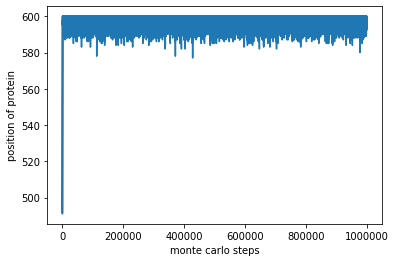

In [19]:
mc(1000000)

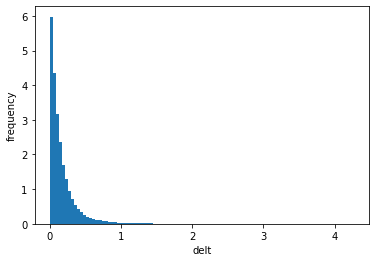

In [20]:
plt.hist(t_list,bins = 100, density = True)
plt.xlabel("delt")
plt.ylabel("frequency")
plt.show()

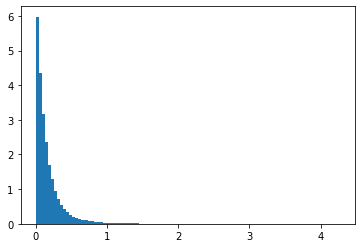

In [21]:
n, bins, patches = plt.hist(t_list, bins = 100, density = True)

In [22]:
print("Area below the integral: ", np.sum(n * np.diff(bins)))

Area below the integral:  1.0


In [23]:
print("Area below the integral: ", np.sum(n * np.diff(bins)))

Area below the integral:  1.0


In [24]:
area = np.sum(n * np.diff(bins))

In [25]:
bins

array([1.83143030e-07, 4.27421162e-02, 8.54840493e-02, 1.28225982e-01,
       1.70967915e-01, 2.13709848e-01, 2.56451781e-01, 2.99193715e-01,
       3.41935648e-01, 3.84677581e-01, 4.27419514e-01, 4.70161447e-01,
       5.12903380e-01, 5.55645313e-01, 5.98387246e-01, 6.41129179e-01,
       6.83871112e-01, 7.26613045e-01, 7.69354978e-01, 8.12096911e-01,
       8.54838844e-01, 8.97580777e-01, 9.40322710e-01, 9.83064644e-01,
       1.02580658e+00, 1.06854851e+00, 1.11129044e+00, 1.15403238e+00,
       1.19677431e+00, 1.23951624e+00, 1.28225817e+00, 1.32500011e+00,
       1.36774204e+00, 1.41048397e+00, 1.45322591e+00, 1.49596784e+00,
       1.53870977e+00, 1.58145171e+00, 1.62419364e+00, 1.66693557e+00,
       1.70967751e+00, 1.75241944e+00, 1.79516137e+00, 1.83790330e+00,
       1.88064524e+00, 1.92338717e+00, 1.96612910e+00, 2.00887104e+00,
       2.05161297e+00, 2.09435490e+00, 2.13709684e+00, 2.17983877e+00,
       2.22258070e+00, 2.26532264e+00, 2.30806457e+00, 2.35080650e+00,
      

In [26]:
print("patches: ", patches)
for i in range(10):
    print(patches[i])

patches:  <a list of 100 Patch objects>
Rectangle(xy=(1.83143e-07, 0), width=0.0427419, height=5.97629, angle=0)
Rectangle(xy=(0.0427421, 0), width=0.0427419, height=4.34625, angle=0)
Rectangle(xy=(0.085484, 0), width=0.0427419, height=3.16921, angle=0)
Rectangle(xy=(0.128226, 0), width=0.0427419, height=2.34905, angle=0)
Rectangle(xy=(0.170968, 0), width=0.0427419, height=1.70612, angle=0)
Rectangle(xy=(0.21371, 0), width=0.0427419, height=1.28721, angle=0)
Rectangle(xy=(0.256452, 0), width=0.0427419, height=0.957935, angle=0)
Rectangle(xy=(0.299194, 0), width=0.0427419, height=0.724511, angle=0)
Rectangle(xy=(0.341936, 0), width=0.0427419, height=0.549811, angle=0)
Rectangle(xy=(0.384678, 0), width=0.0427419, height=0.429906, angle=0)


In [27]:
#compute the count of each bin of histogram made for t_list
counts, bin_edges = np.histogram(t_list, bins=100)
print(counts)

[255438 185767 135458 100403  72923  55018  40944  30967  23500  18375
  14176  11370   8821   7303   5898   4800   4124   3372   2862   2449
   2035   1862   1549   1329   1153    993    824    761    669    613
    519    420    422    371    289    271    220    200    174    175
    132    128    106    106     80     72     69     60     44     39
     47     37     34     20     29     20     25     15     14     15
     13     11     13      6      6      2      5      2      1      3
      6      1      2      3      1      2      1      3      3      0
      1      0      0      1      0      1      0      0      0      0
      0      0      1      0      2      0      0      0      0      1]


In [28]:
c = counts/sum(counts)
print(c)

[2.55438e-01 1.85767e-01 1.35458e-01 1.00403e-01 7.29230e-02 5.50180e-02
 4.09440e-02 3.09670e-02 2.35000e-02 1.83750e-02 1.41760e-02 1.13700e-02
 8.82100e-03 7.30300e-03 5.89800e-03 4.80000e-03 4.12400e-03 3.37200e-03
 2.86200e-03 2.44900e-03 2.03500e-03 1.86200e-03 1.54900e-03 1.32900e-03
 1.15300e-03 9.93000e-04 8.24000e-04 7.61000e-04 6.69000e-04 6.13000e-04
 5.19000e-04 4.20000e-04 4.22000e-04 3.71000e-04 2.89000e-04 2.71000e-04
 2.20000e-04 2.00000e-04 1.74000e-04 1.75000e-04 1.32000e-04 1.28000e-04
 1.06000e-04 1.06000e-04 8.00000e-05 7.20000e-05 6.90000e-05 6.00000e-05
 4.40000e-05 3.90000e-05 4.70000e-05 3.70000e-05 3.40000e-05 2.00000e-05
 2.90000e-05 2.00000e-05 2.50000e-05 1.50000e-05 1.40000e-05 1.50000e-05
 1.30000e-05 1.10000e-05 1.30000e-05 6.00000e-06 6.00000e-06 2.00000e-06
 5.00000e-06 2.00000e-06 1.00000e-06 3.00000e-06 6.00000e-06 1.00000e-06
 2.00000e-06 3.00000e-06 1.00000e-06 2.00000e-06 1.00000e-06 3.00000e-06
 3.00000e-06 0.00000e+00 1.00000e-06 0.00000e+00 0.

In [29]:
new = c*counts